# ARIMA Modelling
## Introduction
- 활용 데이터1: Dacon 경진대회 시즌2 데이터  
  
필요한 package, install 및 import

In [ ]:
# !pip install pmdarima

import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt. style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

## Data description
데이터 불러오기

In [31]:
os.getcwd() 
os.chdir(r"C:\Users\yeahaluu\[STUDY] Data Science\Dacon_bitcoin_경진대회\open")

train_x_df = pd.read_csv('train_x_df.csv')
train_y_df = pd.read_csv('train_y_df.csv')
test_x_df = pd.read_csv('test_x_df.csv')
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [265]:
# 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
# Dacon 코드 공유 게시판 참고

def df2d_to_array3d(df_2d):
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    print(feature_size, time_size, sample_size)
    sample_index = df_2d.sample_id.value_counts().index
    print(sample_index)
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [44]:
print(train_x_df.shape)
train_x_df.head()

(10572180, 12)


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [45]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

10 1380 7661
Int64Index([7660, 2556, 2544, 2547, 2546, 2549, 2548, 2551, 2550, 2553,
            ...
            5107, 5104, 5105, 5110, 5111, 5108, 5109, 5114, 5115,    0],
           dtype='int64', length=7661)
10 120 7661
Int64Index([2047, 2731, 7338, 5291, 3752, 1705, 5803, 4264, 6313,  170,
            ...
            2901, 4950, 6999, 1364, 3413, 5462, 7511, 1876, 3925,    0],
           dtype='int64', length=7661)
10 1380 535
Int64Index([8188, 7857, 7847, 7846, 7845, 7844, 7851, 7850, 7849, 7848,
            ...
            8035, 8034, 8033, 8032, 8039, 8038, 8037, 8036, 8043, 7683],
           dtype='int64', length=535)


In [46]:
print(f'''
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


train_x_array (7661, 1380, 10)
train_y_array (7661, 120, 10)
test_x_array (535, 1380, 10)



## 샘플 확인

In [36]:
# 입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 함수
# Dacon 코드 공유 게시판 참조
def plot_series(x_series, y_series):
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

In [143]:
idx = 0

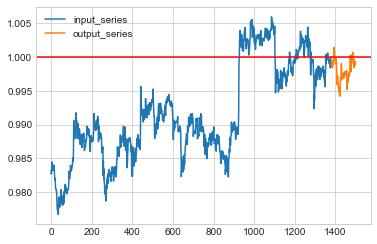

In [133]:
plot_series(train_x_array[idx,:,4], train_y_array[idx,:,4]) # 1-4, open, high, low, close
plt.show()

In [134]:
idx = 1

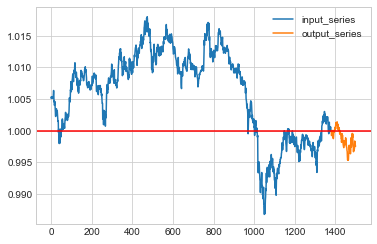

In [135]:
plot_series(train_x_array[idx,:,4], train_y_array[idx,:,4])
plt.show()

In [136]:
idx = 2

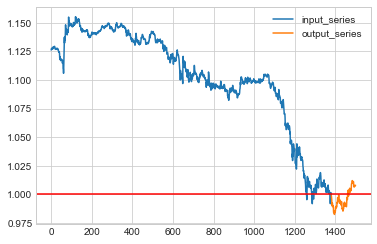

In [137]:
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,4])
plt.show() # non-stational data

## ARIMA 
ARIMA modeling
### sample_id=0

In [60]:
idx = 0
what_data = 4 # 1-4, open, high, low, close

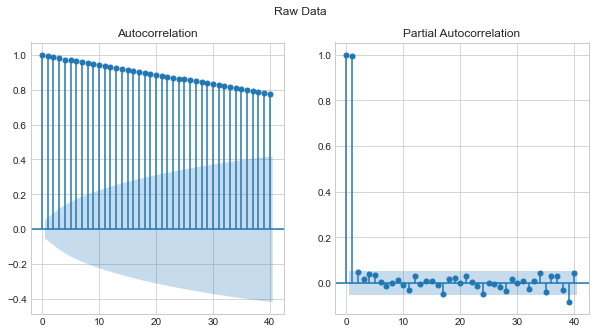

In [63]:
# acf, pacf
# acf 그래프가 점차적으로 줄어든느 것은 비정상성 데이터의 대표적 모습. 따라서 non-staional data임을 확인
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_x_array[idx,:,what_data].squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_x_array[idx,:,what_data].squeeze(), lags=40, ax=ax[1]);

In [128]:
# 차분 구하기 위해 df 만들기
# 처음 부터 했어야 했는데...
idx = 0

is_idx = train_x_df['sample_id'] == idx
idx_train_x_df = train_x_df[is_idx]

is_idx = train_y_df['sample_id'] == idx
idx_train_y_df = train_y_df[is_idx]

# idx_train_x_df.head()
idx_train_x_df.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
1375,0,1375,9,0.999015,0.999388,0.998400,0.998400,0.002577,20.899395,0.017492,0.001371,11.117771
1376,0,1376,9,0.998400,0.999260,0.998400,0.999016,0.001256,10.188805,0.011333,0.000556,4.510879
1377,0,1377,9,0.999018,0.999629,0.998936,0.999629,0.002902,23.543552,0.014289,0.001761,14.289263
1378,0,1378,9,0.999629,1.000116,0.999143,1.000000,0.004383,35.568905,0.020941,0.002810,22.806458
1379,0,1379,9,1.000000,1.000123,0.999388,0.999998,0.001269,10.297554,0.014782,0.000909,7.376117


In [104]:
# 차분 진행
diff_train_x_df = idx_train_x_df.copy()
diff_train_x_df = diff_train_x_df['close'].diff()
diff_train_x_df = diff_train_x_df.dropna()
print('###### Raw Data #######')
print(idx_train_x_df)
print('### Differenced Data ###')
print(diff_train_x_df)

###### Raw Data #######
      sample_id  time  coin_index      open      high       low     close  \
0             0     0           9  0.983614  0.983614  0.983128  0.983246   
1             0     1           9  0.983245  0.983612  0.982453  0.982693   
2             0     2           9  0.982694  0.983612  0.982403  0.983002   
3             0     3           9  0.983009  0.984848  0.983009  0.984486   
4             0     4           9  0.984233  0.984606  0.983612  0.984164   
...         ...   ...         ...       ...       ...       ...       ...   
1375          0  1375           9  0.999015  0.999388  0.998400  0.998400   
1376          0  1376           9  0.998400  0.999260  0.998400  0.999016   
1377          0  1377           9  0.999018  0.999629  0.998936  0.999629   
1378          0  1378           9  0.999629  1.000116  0.999143  1.000000   
1379          0  1379           9  1.000000  1.000123  0.999388  0.999998   

        volume   quote_av    trades  tb_base_av  tb

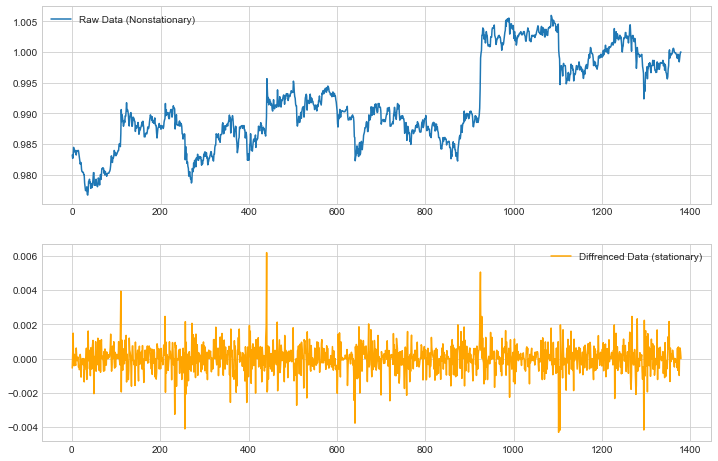

In [105]:
# differenced data plot
# 차분 했을 때 더 stationary
plt.figure(figsize =(12, 8))
plt.subplot(211)
plt.plot(idx_train_x_df['close'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_x_df,'orange') # 1차 차분
plt.legend(['Diffrenced Data (stationary)'])
plt.show()

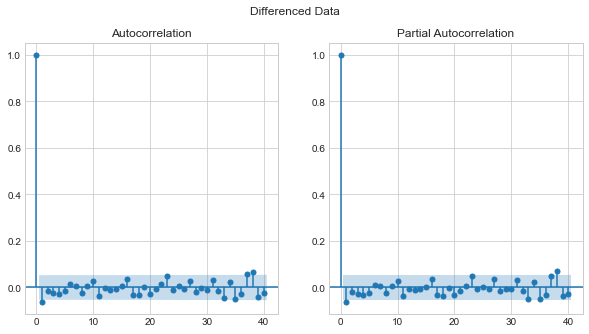

In [106]:
# acf, pacf of diffrenced data
# parameter 어떻게 해야할지 모르겠다.
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_x_df.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_x_df.values.squeeze(), lags=40, ax=ax[1]);

In [220]:
# 그래서 auto_arima package를 통해 arima 탐색
auto_arima_model = auto_arima(idx_train_x_df['close'], start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15711.676, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15715.214, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15713.652, Time=1.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-15712.775, Time=2.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15715.016, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15714.272, Time=1.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15374.650, Time=1.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-15711.694, Time=2.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-15713.466, Time=1.69 sec


C:\Users\yeahaluu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1888: RuntimeWarning: divide by zero encountered in reciprocal
  (array) Roots of the reduced form autoregressive lag polynomial
C:\Users\yeahaluu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1895: RuntimeWarning: divide by zero encountered in reciprocal
  (array) Roots of the reduced form moving average lag polynomial


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15705.659, Time=0.80 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15436.556, Time=2.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-15709.514, Time=2.73 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-15712.419, Time=0.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-15710.502, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-15709.257, Time=1.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 21.787 seconds


In [221]:
auto_arima_model.summary() # AIC score 보기

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1380
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7860.607
Date:                Wed, 05 May 2021   AIC                         -15715.214
Time:                        22:43:28   BIC                         -15699.527
Sample:                             0   HQIC                        -15709.345
                               - 1380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.213e-05   2.06e-05      0.588      0.557   -2.83e-05    5.26e-05
ma.L1         -0.0640      0.019     -3.310      0.001      -0.102      -0.026
sigma2      6.551e-07    1.3e-08     50.262      0.000     6.3e-07    6.81e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2752.40
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.02
Prob(H) (two-sided):                  0.77   Kurtosis:                         9.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
prediction = auto_arima_model.predict(len(idx_train_y_df), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index= list(idx_train_y_df.index+1380)
predict_index[0]

y_df = idx_train_y_df['close']
y_df.index = predict_index

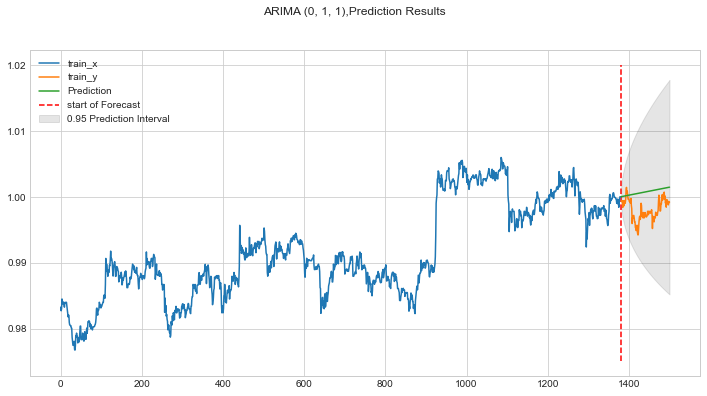

In [224]:
fig, ax = plt.subplots(figsize=(12,6))
idx_train_x_df['close'].plot(ax=ax, label='train_x');
idx_train_y_df['close'].plot(label='train_y')
ax.vlines(predict_index[0], 0.975, 1.02, linestyle='--', color='r', label='start of Forecast');
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},Prediction Results')
plt.show()

### sample_id = 1

In [244]:
idx = 1

is_idx = train_x_df['sample_id'] == idx
idx_train_x_df = train_x_df[is_idx]

is_idx = train_y_df['sample_id'] == idx
idx_train_y_df = train_y_df[is_idx]

idx_train_x_df.head()
# idx_train_x_df.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
1380,1,0,9,1.005161,1.005649,1.005086,1.005333,0.000253,2.720014,0.008499,0.000198,2.132451
1381,1,1,9,1.005379,1.005418,1.005088,1.005095,0.000330,3.549867,0.010834,0.000189,2.035440
1382,1,2,9,1.005249,1.005379,1.005088,1.005334,0.000531,5.712976,0.009433,0.000333,3.585980
1383,1,3,9,1.005118,1.005337,1.005058,1.005280,0.000347,3.735480,0.009527,0.000203,2.186018
1384,1,4,9,1.005335,1.005418,1.005277,1.005277,0.000419,4.506611,0.008499,0.000293,3.152985


In [235]:
# 그래서 auto_arima package를 통해 arima 탐색
auto_arima_model = auto_arima(idx_train_x_df['close'], start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16259.497, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16274.547, Time=3.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16273.157, Time=1.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-16273.300, Time=2.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16273.477, Time=2.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16272.904, Time=2.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16272.049, Time=3.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-16271.152, Time=2.90 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-16273.914, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-16270.648, Time=2.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16271.033, Time=2.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-16268.830, Time=1.99 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-16273.224, Time=2.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-16271.267, Time=2.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-16269

In [254]:
x_df = idx_train_x_df['close']
x_df.index = list(range(0, 1380))
y_df = idx_train_y_df['close']
y_df.index = list(range(1380,1500))

prediction = auto_arima_model.predict(len(idx_train_y_df), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index= list(y_df.index)
predict_index[0]

1380

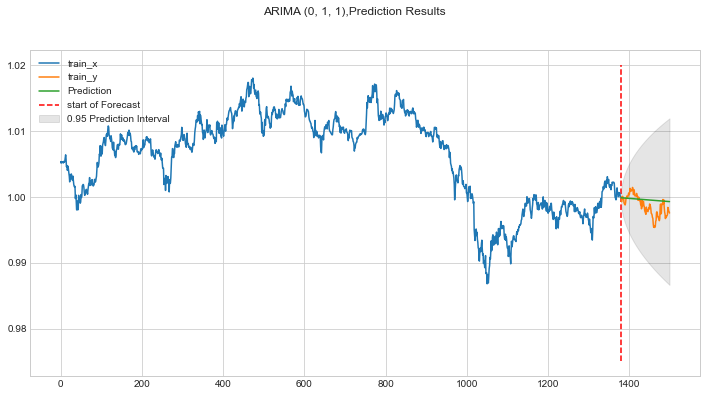

In [255]:
fig, ax = plt.subplots(figsize=(12,6))
idx_train_x_df['close'].plot(ax=ax, label='train_x');
idx_train_y_df['close'].plot(label='train_y')
ax.vlines(predict_index[0], 0.975, 1.02, linestyle='--', color='r', label='start of Forecast');
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},Prediction Results')
plt.show()

### sample_id=2

In [256]:
idx = 2

is_idx = train_x_df['sample_id'] == idx
idx_train_x_df = train_x_df[is_idx]

is_idx = train_y_df['sample_id'] == idx
idx_train_y_df = train_y_df[is_idx]

idx_train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
2760,2,0,4,1.126241,1.127684,1.126208,1.127684,44273.351562,14872.957031,60.386475,29994.632812,10078.298828
2761,2,1,4,1.127214,1.127717,1.126476,1.127717,109846.351562,36906.078125,97.289322,97795.562500,32858.902344
2762,2,2,4,1.127751,1.128187,1.127717,1.128187,52078.972656,17508.890625,60.386475,19612.185547,6594.167480
2763,2,3,4,1.127717,1.128086,1.126879,1.127751,57620.437500,19365.796875,50.322063,29510.535156,9920.967773
2764,2,4,4,1.127214,1.127919,1.127214,1.127550,49312.937500,16571.304688,26.838432,2035.359741,684.308289


In [257]:
# 그래서 auto_arima package를 통해 arima 탐색
auto_arima_model = auto_arima(idx_train_x_df['close'], start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12948.583, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12957.144, Time=1.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-12961.478, Time=1.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-12962.826, Time=1.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12955.799, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12960.525, Time=1.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12960.892, Time=2.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-12961.374, Time=0.79 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12959.280, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12943.964, Time=2.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12953.910, Time=1.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-12959.596, Time=1.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-12961.671, Time=2.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-12959.958, Time=1.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-12957

In [258]:
x_df = idx_train_x_df['close']
x_df.index = list(range(0, 1380))
y_df = idx_train_y_df['close']
y_df.index = list(range(1380,1500))

prediction = auto_arima_model.predict(len(idx_train_y_df), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index= list(y_df.index)
predict_index[0]

1380

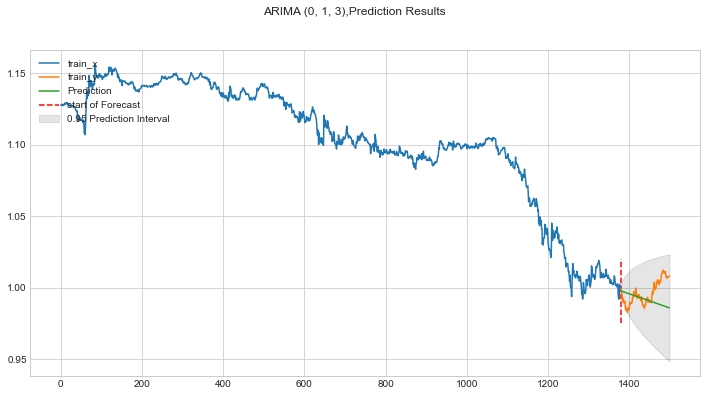

In [259]:
fig, ax = plt.subplots(figsize=(12,6))
idx_train_x_df['close'].plot(ax=ax, label='train_x');
idx_train_y_df['close'].plot(label='train_y')
ax.vlines(predict_index[0], 0.975, 1.02, linestyle='--', color='r', label='start of Forecast');
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},Prediction Results')
plt.show()

### sample_id=3

In [261]:
idx = 3

is_idx = train_x_df['sample_id'] == idx
idx_train_x_df = train_x_df[is_idx]

is_idx = train_y_df['sample_id'] == idx
idx_train_y_df = train_y_df[is_idx]

idx_train_x_df.head()
# idx_train_x_df.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4140,3,0,0,0.986513,0.989488,0.986513,0.987579,510.297638,4540.793945,5.439066,301.492981,2683.399902
4141,3,1,0,0.988456,0.989577,0.988345,0.989377,597.578003,5323.973145,3.996048,150.699875,1342.802734
4142,3,2,0,0.989644,0.992108,0.988356,0.992108,946.894836,8438.500977,6.549079,471.550354,4202.984863
4143,3,3,0,0.990898,0.993462,0.990898,0.993029,872.469482,7801.082520,8.436102,621.609741,5558.087891
4144,3,4,0,0.992363,0.993673,0.992352,0.993673,678.706604,6073.116699,4.551055,484.584137,4336.863770


In [262]:
# 그래서 auto_arima package를 통해 arima 탐색
auto_arima_model = auto_arima(idx_train_x_df['close'], start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14138.602, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14141.345, Time=1.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14141.763, Time=1.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-14141.110, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14141.765, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14140.312, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14140.009, Time=1.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-14138.744, Time=1.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14141.225, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14132.556, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14138.147, Time=1.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-14137.833, Time=1.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14141.187, Time=1.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14139.083, Time=1.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14138

In [263]:
x_df = idx_train_x_df['close']
x_df.index = list(range(0, 1380))
y_df = idx_train_y_df['close']
y_df.index = list(range(1380,1500))

prediction = auto_arima_model.predict(len(idx_train_y_df), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index= list(y_df.index)
predict_index[0]

1380

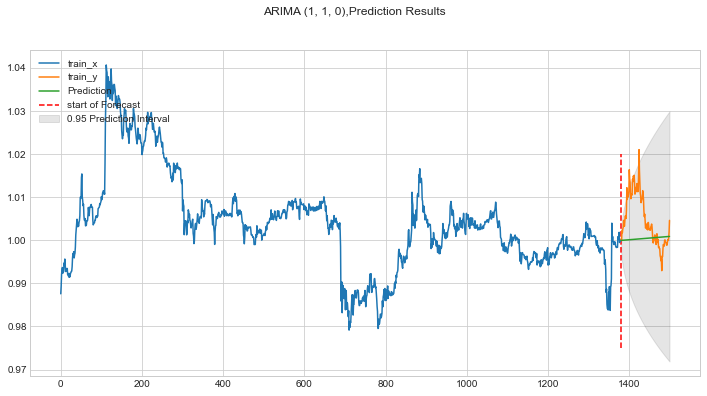

In [264]:
fig, ax = plt.subplots(figsize=(12,6))
idx_train_x_df['close'].plot(ax=ax, label='train_x');
idx_train_y_df['close'].plot(label='train_y')
ax.vlines(predict_index[0], 0.975, 1.02, linestyle='--', color='r', label='start of Forecast');
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},Prediction Results')
plt.show()

### 결론
더 이상 해볼 의미가 없다. 중간에 오르고 내림이 전혀 반영되지 않고 심지어 결과마저 맞다고 할 수 없다.  
그러면 다른 팀들은 왜 ARIMA를 썼을까? -> 다른 모델과 비교해서 ARIMA가 쓸모있을 때만 쓸 수도 있다. 
1. ARIMA를 쓰는 법을 연구해보자. 
2. 어떤 모델과 같이 쓰면 좋을까?